In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-failure-prediction/heart.csv


### Hi! My name is Alex and this is my first notebook in order to show you my approach to this problem. As this is my first notebook I will try to state clearly my hypothesis so we can discuss in the comments. I hope you can enjoy it as much as I enjoyed while I was writting this! :D

# Import data


In [2]:
heart = pd.read_csv("/kaggle/input/heart-failure-prediction/heart.csv")

### See the first five rows of the dataset to see if the data has been loaded well

In [3]:
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


### At first sight we can conclude there are 5 categorical data. Which are Sex, ChestPainType, RestingECG, ExerciseAngina and ST_Slope
### Let's see if the target variable is skewed. If so we have to use other techniques such as undersampling or oversampling.

In [4]:
heart["HeartDisease"].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

### Due to the fact the results are balanced (nearly 50% each one) we do not need to use those techniques :)

### Let's see info of the columns in order to get some insights of the dataset such as **null entries** or which columns have **categorical data**

In [5]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


### At this point we can conclude there are no null entries on the dataset. This doesn't mean that there is not null data because sometimes people can use different values to represent missing data, and Pandas will not recognize that :\ . But not everything is lost! We can use different methods to differentiate those points. Here I would like to start the EDA, and plot different graphs to have a wider view of the dataset

## *Exploratory Data Analysis*

### First let's import Seaborn to make the plots

In [6]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)}) #Bigger images

### Correlation matrix

With the correlation matrix we can see the relationship between the different variables. The number has a range between 1 and -1 and represents if there is a **linear** relationship between two variables. It is important to remember that shows only **linear** relationships becuase a correlation of zero doesn't mean there is no relationship, it just shows there is no **linear** relationship.

It is important to remember that this matrix is simetric so the info of the upper diagonal is the same as the one in the lower diagonal.

<AxesSubplot:>

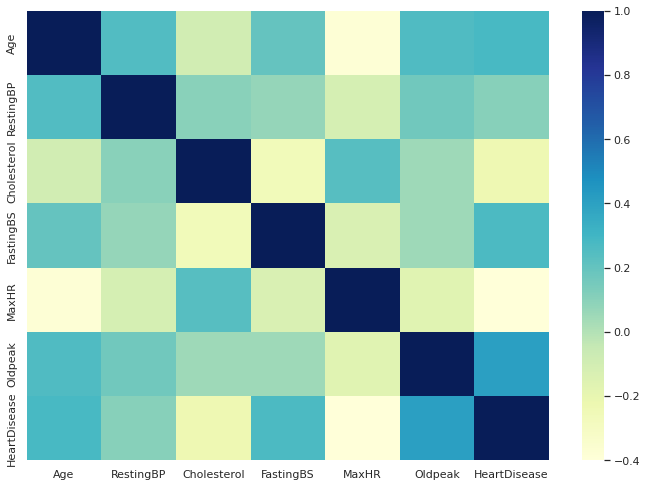

In [7]:
sns.heatmap(heart.corr(),cmap="YlGnBu")

### In order to see the relation between the different variables I will use a pairplot.

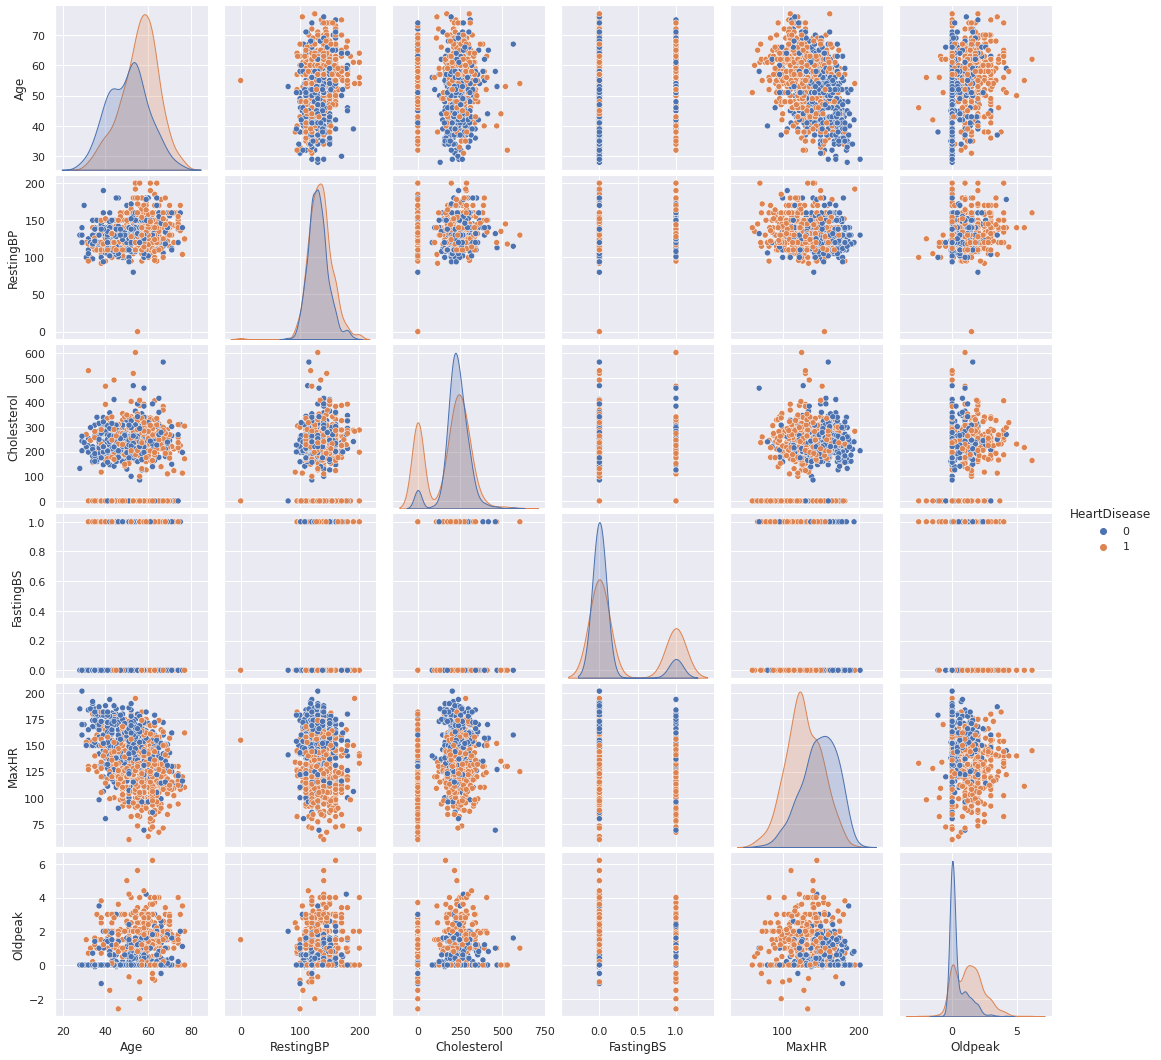

In [8]:
sns.pairplot(heart,hue="HeartDisease")

### With hue we can change the color regarding heart disease. With this plots we can see that oldpeak and restingBP has very long tails. This sometimes can be a symptom of data that has been loaded incorrectly or extreme values used to represent missing data.
### Let's see the box plots to see more clearly the outliers.

## Outliers

### Using boxplots it's easy and fast to see the outliers as it represents those points clearly on the plot.

<AxesSubplot:>

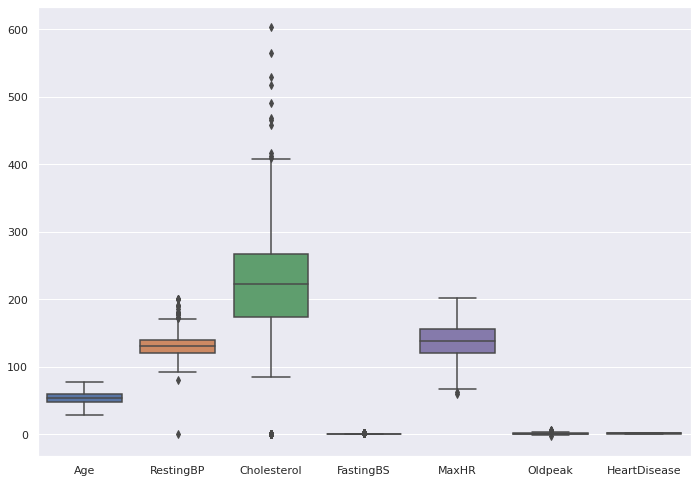

In [9]:
sns.boxplot(data=heart)

### With a quick research we can see some values with RestingBP near zero, which is not possible. Also some there are some values with
### Cholesterol near zero which is not possible also. Let's analizy how many of them are like that and
### Here I will replace the RestingBP equal zero with the median as this is more resistant to outliers that the mean

In [10]:

heart[heart["RestingBP"]<50]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1


Let's ask which are the points with low RestingBP
Here we see the entry do not has RestingBP Cholesterol and FastingBS. I will drop it because it is
too much effort in order to obtain one entry.

In [11]:
heart[heart["Cholesterol"]==0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65,M,ASY,115,0,0,Normal,93,Y,0.0,Flat,1
294,32,M,TA,95,0,1,Normal,127,N,0.7,Up,1
295,61,M,ASY,105,0,1,Normal,110,Y,1.5,Up,1
296,50,M,ASY,145,0,1,Normal,139,Y,0.7,Flat,1
297,57,M,ASY,110,0,1,ST,131,Y,1.4,Up,1
...,...,...,...,...,...,...,...,...,...,...,...,...
514,43,M,ASY,122,0,0,Normal,120,N,0.5,Up,1
515,63,M,NAP,130,0,1,ST,160,N,3.0,Flat,0
518,48,M,NAP,102,0,1,ST,110,Y,1.0,Down,1
535,56,M,ASY,130,0,0,LVH,122,Y,1.0,Flat,1


Here I will split the work in two, due to the fact that 0 value for cholesterol is representing missing values
I will replace the values with the median value of the data without these.

In [12]:
heart[heart["Cholesterol"]!= 0]["Cholesterol"].median()

237.0

In [13]:
heart.loc[heart["Cholesterol"]==0,"Cholesterol"] = heart[heart["Cholesterol"]!= 0]["Cholesterol"].median()


I will impute those values with the median value of the Cholesterol dataset without the zero values, which where used as the default value.

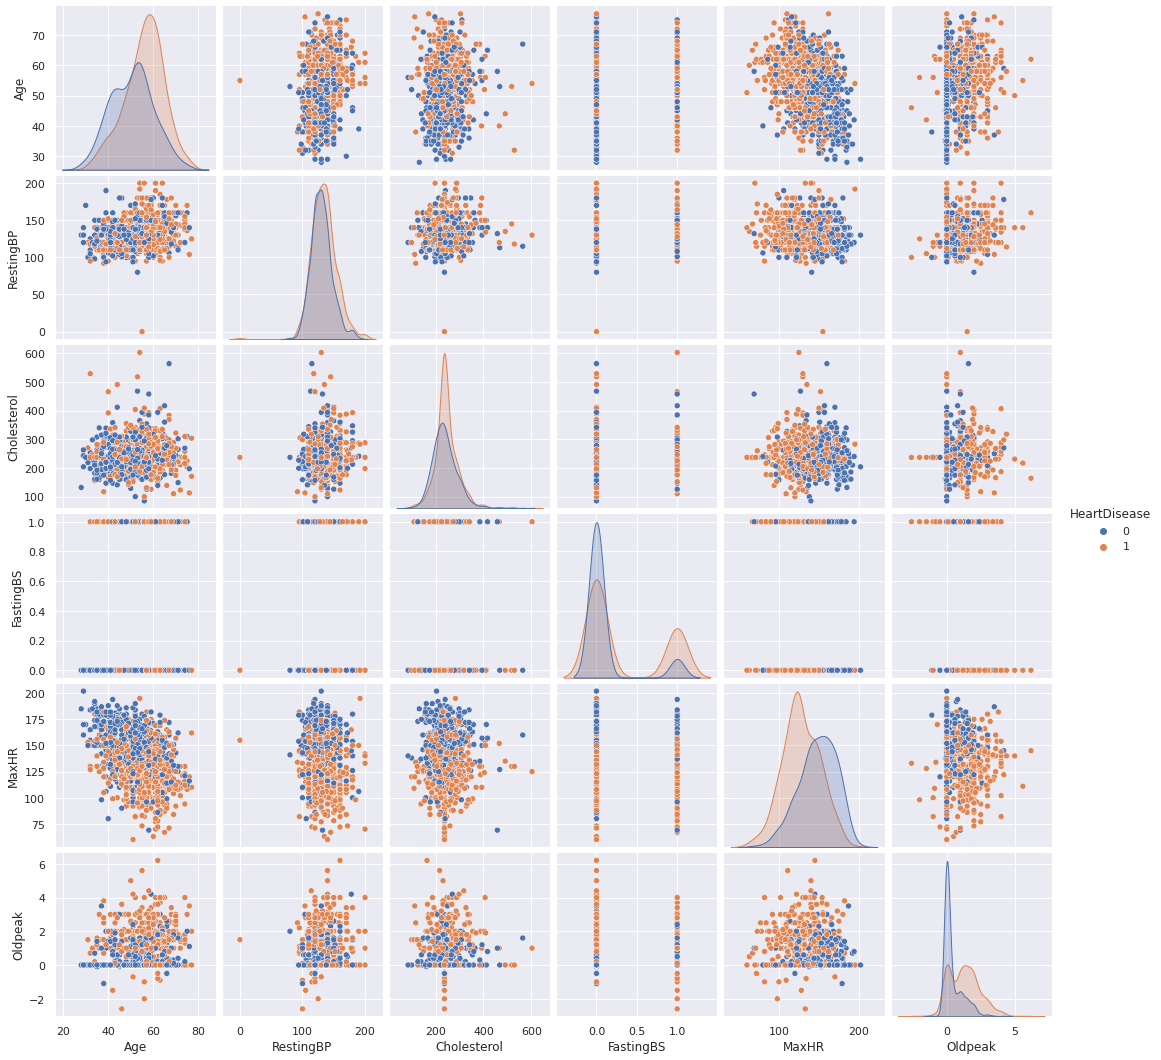

In [14]:
sns.pairplot(data=heart,hue="HeartDisease")

Let's see if the distribution has been modified

In [15]:
heart_tree = heart

Get the name of the columns with categorical type

In [16]:
cat_cols = heart.select_dtypes("object").columns.to_list()
cat_cols

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

Let's enconde the labels in order to use tree models such as XGDBoost, TreeClassifier, RandomForest, etc. Because with this stimators there is no need to scale the data.


In [17]:
from sklearn.preprocessing import LabelEncoder
#Manually
heart_tree["Sex"]=heart["Sex"].apply(lambda x: 0 if x=="M" else 1)
heart_tree["ChestPainType"]=heart["ChestPainType"].apply(lambda x: 0 if x=="ATA" else (1 if x=="NAP" else (2 if x=="ASY" else 3)))
heart_tree["ExerciseAngina"]=heart["ExerciseAngina"].apply(lambda x: 0 if x=="Y" else 1)
heart_tree["RestingECG"]=heart["RestingECG"].apply(lambda x: 0 if x=="Normal" else (1 if x=="ST" else 2))
heart_tree["ST_Slope"]=heart["ST_Slope"].apply(lambda x: 0 if x=="Flat" else (1 if x=="Up" else 2))

#Automatically encode
heart_tree_2 = heart.apply(LabelEncoder().fit_transform)

See the modified dataset

In [18]:
heart_tree_2.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,12,0,0,41,146,0,0,98,1,10,1,0
1,21,1,1,55,39,0,0,82,1,20,0,1
2,9,0,0,31,140,0,1,25,1,10,1,0
3,20,1,2,39,71,0,0,34,0,25,0,1
4,26,0,1,49,52,0,0,48,1,10,1,0


# Tree based algorithm
This kind of algorithms do not care about data scale so we do not need to use the one hot encoder to split the categorical data into dummy categories.

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

Separate the data

In [20]:
X = heart_tree_2.drop(axis=1,labels="HeartDisease")
y = heart_tree_2["HeartDisease"]

Split the data

In [21]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=10)

In [22]:
Stimator = DecisionTreeClassifier(criterion="entropy",random_state = 101)
grid = {"max_depth" : [1,2,3,4,5,6,7,8,9]}

In [23]:
gso = GridSearchCV(Stimator,grid,cv=5)

In [24]:
gso.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              random_state=101),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9]})

In [25]:
y_pred = gso.predict(x_test)

In [26]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [27]:
confusion_matrix(y_test,y_pred)

array([[ 95,  32],
       [ 29, 120]])

In [28]:
accuracy_score(y_test,y_pred)

0.7789855072463768

In [29]:
gso.best_params_

{'max_depth': 5}

In [30]:
Stimator_forest = RandomForestClassifier(criterion="entropy")
#To optimize information gain
grid_forest = {"n_estimators" : [100,200,300,400,500,600,700,800,1000,2000,3000]}
gso_forest = GridSearchCV(Stimator_forest,grid_forest,cv = 5)

In [31]:
gso_forest.fit(x_train,y_train)
y_predforest = gso_forest.predict(x_test)
accuracy_score(y_test,y_predforest)

0.8405797101449275

In [32]:
Stimator_XGBC = XGBClassifier(use_label_encoder=False)
Stimator_XGBC.fit(x_train,y_train)
y_predXGBC = Stimator_XGBC.predict(x_test)
accuracy_score(y_test,y_predXGBC)

[18:27:59] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.822463768115942

# Distance Based Algorithm
Let's import the libraries we are going to use

In [33]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler


Get the dummy variables in order to be able to scale the data without loosing information

In [34]:
heart = pd.read_csv("/kaggle/input/heart-failure-prediction/heart.csv")

In [35]:
heart_distance = pd.get_dummies(heart)

In [36]:
heart_distance.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1


In [37]:
X = heart_distance.drop(columns="HeartDisease",axis=1) 
y = heart_distance["HeartDisease"]

In [38]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=10)

In [39]:
scaler = StandardScaler()
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.transform(x_test)

In [40]:
Stimator_logReg = SVC(kernel="rbf")
grid_svc = {"gamma":[0.001,0.01,0.1,1,10],"C":[0.1,1,10,100,1000]}
gso_logreg = GridSearchCV(Stimator_logReg,grid_svc,cv = 5)

In [41]:
gso_logreg.fit(scaled_x_train,y_train)
y_predlogreg = gso_logreg.predict(scaled_x_test)
accuracy_score(y_test,y_predlogreg)
#GOOD SCORE

0.8514492753623188